In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [36]:
Cemex = pd.read_csv('./Stock_Prices/Cemex.csv',
                    usecols=[0, 4, 5], 
                    header=0, 
                    names=['Date', 'Stock Price', 'Vol. Stocks']) #'Close' only of value; final price for the day.

In [37]:
Cemex.head()

,Date,Stock Price,Vol. Stocks
0,2019-08-23,3.12,3.078064
1,2019-08-26,3.15,3.107661
2,2019-08-27,3.20,3.156989
3,2019-08-28,3.27,3.226048
4,2019-08-29,3.57,3.522016


In [38]:
Cemex.dtypes[1]

dtype('float64')

In [51]:
Amazon = pd.read_csv('./Stock_Prices/Amazon.csv', 
                     usecols=[0, 4, 5], 
                     header=0, 
                     names=['Date', 'Stock Price', 'Vol. Stocks'])
Wacom = pd.read_csv('./Stock_Prices/Wacom.csv', 
                     usecols=[0, 4, 5], 
                     header=0, 
                     names=['Date', 'Stock Price', 'Vol. Stocks'])
TataSteel = pd.read_csv('./Stock_Prices/TataSteel.csv', 
                     usecols=[0, 4, 5], 
                     header=0, 
                     names=['Date', 'Stock Price', 'Vol. Stocks'])
UPS = pd.read_csv('./Stock_Prices/UPS.csv', 
                     usecols=[0, 4, 5], 
                     header=0, 
                     names=['Date', 'Stock Price', 'Vol. Stocks'])
Logitech = pd.read_csv('./Stock_Prices/Logitech.csv', 
                     usecols=[0, 4, 5], 
                     header=0, 
                     names=['Date', 'Stock Price', 'Vol. Stocks'])

Companies = [Cemex, Amazon, Wacom, TataSteel, UPS, Logitech]
Company_Names = ['Cemex', 'Amazon', 'Wacom', 'TataSteel', 'UPS', 'Logitech']

In [52]:
for Company in Companies:
    if Company.dtypes[1] != 'float64':
        print('Stock Prices column in '+Company+' is of dtype:'+Company.dtype[1])
    if Company.dtypes[2] != 'float64':
        print('Vol. Stocks column in '+Company+' is of dtype:'+Company.dtype[1])

In [114]:
from datetime import datetime as dt

In [54]:
for Company in Companies:
    Company['Date']=Company['Date'].apply(dt.strptime, args=('%Y-%m-%d',))

In [115]:
import matplotlib.pyplot as plt

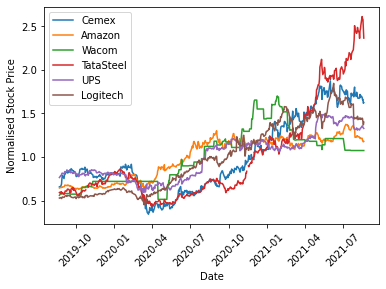

In [61]:
i = 0
for Company in Companies:
    plt.plot(Company['Date'], Company['Normalised Stock Price'], label=Company_Names[i])
    i += 1
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Normalised Stock Price');

In [57]:
for Company in Companies:
    mean_stock_price=Company['Stock Price'].agg('mean')
    Company['Normalised Stock Price'] = Company['Stock Price']/mean_stock_price

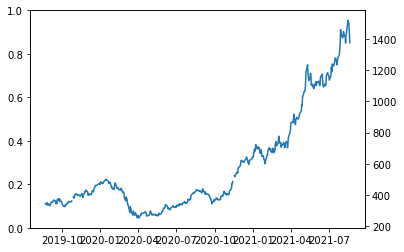

In [43]:
fig, axs = plt.subplots()
#axs.plot(TataSteel['Date'], TataSteel['Normalised Stock Price'])
axs1 = axs.twinx()
axs1.plot(TataSteel['Date'], TataSteel['Stock Price'])

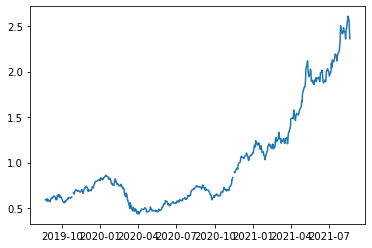

In [42]:
plt.plot(TataSteel['Date'], TataSteel['Stock Price']/(TataSteel['Stock Price'].agg('mean')))

## Section 2

In [2]:
US_Share_Prices = pd.read_csv('./Stock_Prices/US_Daily_Shares.csv', sep=',')

In [5]:
Company_Names = pd.read_csv('./Stock_Prices/Company_Names.csv', ';')

In [6]:
US_Share_Prices = US_Share_Prices.merge(Company_Names[['Ticker', 'Company Name']], how='inner')

In [7]:
US_Share_Prices = US_Share_Prices.drop(['Ticker', 'SimFinId', 'Open', 'Low', 'High', 
                      'Adj. Close', 'Dividend', 'Shares Outstanding'], axis=1).rename(columns={'Company Name':'Company'})

In [9]:
US_Share_Prices.head()

,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,MMM,22219,2020-01-02,177.68,177.14,180.01,180.00,169.52,NaN,3601725,575184835.0
1,MMM,22219,2020-01-03,177.02,175.63,178.66,178.45,168.06,NaN,2466777,575184835.0
2,MMM,22219,2020-01-06,177.15,176.35,178.71,178.62,168.22,NaN,1996293,575184835.0
3,MMM,22219,2020-01-07,178.28,176.82,178.51,177.90,167.54,NaN,2172979,575184835.0
4,MMM,22219,2020-01-08,178.00,177.65,181.50,180.63,170.11,NaN,2758311,575184835.0


In [7]:
US_Share_Prices.dtypes

Ticker                 object
SimFinId                int64
Date                   object
Open                  float64
Low                   float64
High                  float64
Close                 float64
Adj. Close            float64
Dividend              float64
Volume                  int64
Shares Outstanding    float64
dtype: object

In [9]:
#Successful_Companies = US_Share_Prices.copy()#set_index('Company').copy() #DataFrame which will keep only 'successful' companies.
US_Share_Prices['Gradient']=0

All_Names = US_Share_Prices.groupby('Company').groups.keys() #Names of companies. Not using 'Company_Names' DataFrame as that=0
                                                             #hasn't been truncated; this one has to reduce computation time.

for Company in All_Names:
    Fit_DF=US_Share_Prices[US_Share_Prices['Company'] == Company].copy() #DataFrame for particular company to fit model to.
    
    try:
        m, b = np.polyfit(np.arange(0, Fit_DF.shape[0], 1), Fit_DF['Close'], deg=1) #Linear model
        US_Share_Prices['Gradient'] = US_Share_Prices['Gradient'].mask(US_Share_Prices['Company']==Company, m)
    except np.linalg.linalg.LinAlgError:
        continue

C:\Users\James\anaconda3\lib\site-packages\numpy\lib\polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


In [36]:
#pd.set_option('display.max_rows', None)

In [10]:
Successful_Companies = US_Share_Prices[US_Share_Prices['Gradient']>0.5]
Failed_Companies = US_Share_Prices[US_Share_Prices['Gradient']<-0.3]

In [11]:
def Create_DateTime(DataFrame, Format):
    DataFrame['Date'] = DataFrame['Date'].apply(dt.strptime, args=(Format,))
    return DataFrame

In [12]:
Successful_Companies = Create_DateTime(Successful_Companies, '%Y-%m-%d')
Failed_Companies = Create_DateTime(Failed_Companies, '%Y-%m-%d')

Successful_Names = list(Successful_Companies.groupby('Company').groups.keys())
Failed_Names = list(Failed_Companies.groupby('Company').groups.keys())

<ipython-input-11-24ce205648cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['Date'] = DataFrame['Date'].apply(dt.strptime, args=(Format,))


In [13]:
Success_Or_Fail_DF = Failed_Companies
Success_Or_Fail_Names = Failed_Names

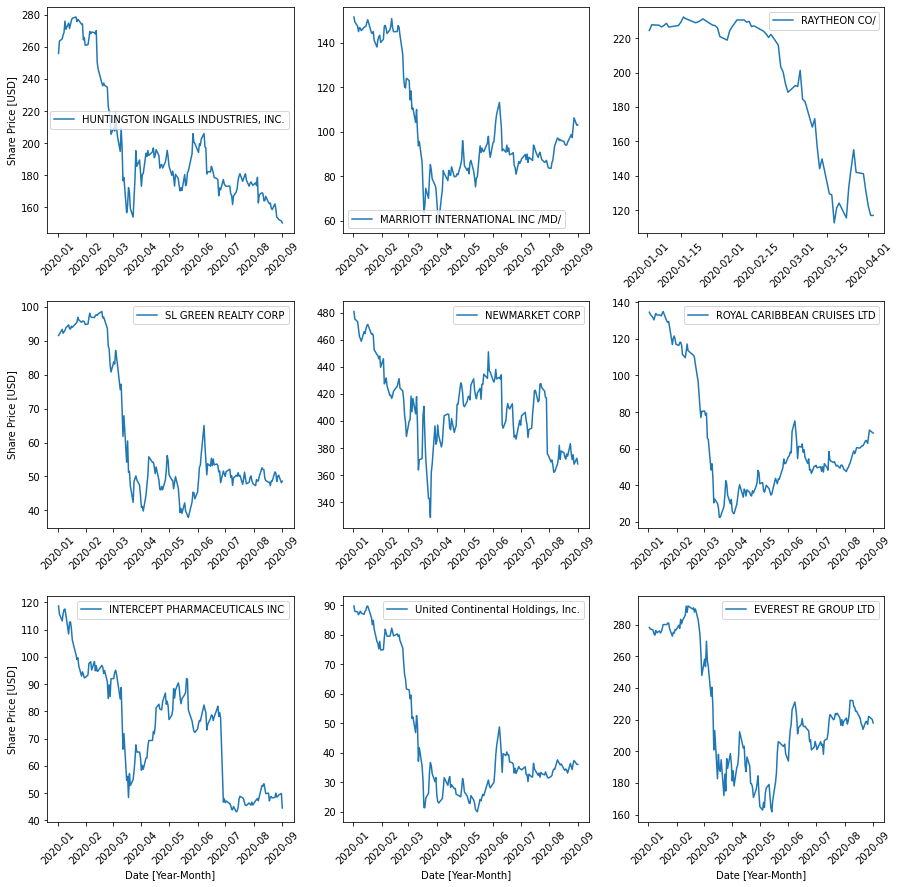

In [15]:
import matplotlib.pyplot as plt
#np.random.seed(0)
np.random.shuffle(Success_Or_Fail_Names)
Selection=Success_Or_Fail_Names[:9]

fig, axes = plt.subplots(3, 3, figsize=(15,15))
i=0

for Company in Selection:

    Company_Data=Success_Or_Fail_DF[Success_Or_Fail_DF['Company']==Company].copy()
    
    axis=axes[int(np.floor(i/3))][int(i%3)]
    axis.plot(Company_Data['Date'], Company_Data['Close'], label=Company)
    axis.legend()
    plt.setp(axis.xaxis.get_majorticklabels(), rotation=45)
    
    i+=1
    
fig.subplots_adjust(hspace=0.3)

axes[0][0].set_ylabel('Share Price [USD]');
axes[1][0].set_ylabel('Share Price [USD]');
axes[2][0].set_ylabel('Share Price [USD]');

axes[2][0].set_xlabel('Date [Year-Month]');
axes[2][1].set_xlabel('Date [Year-Month]');
axes[2][2].set_xlabel('Date [Year-Month]');

In [134]:
TempDF=Growth_Companies.set_index('Company').copy()

for Comp in Names[0]:
    if Growth_Companies[Growth_Companies['Company'] == Comp]['Close'].isnull().sum() > 5:
        TempDF=TempDF.drop(Comp)
    if

In [65]:
Raw_Data = pd.read_csv('./Stock_Prices/Raw_Data.csv', sep=';')

In [71]:
Raw_Data['Date']=Raw_Data['Date'].apply(dt.strptime, args=('%Y-%m-%d',))

In [73]:
Raw_Data=Raw_Data[Raw_Data['Date']>dt.strptime('2020-01-01', '%Y-%m-%d')]

In [78]:
Raw_Data=Raw_Data.reset_index().drop('index', axis=1)

In [80]:
Raw_Data

,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,GOOG,18,2020-01-02,1341.55,1341.55,1368.14,1367.37,1367.37,NaN,1406731,688335000.0
1,GOOG,18,2020-01-03,1347.86,1345.54,1372.50,1360.66,1360.66,NaN,1187006,688335000.0
2,GOOG,18,2020-01-06,1350.00,1350.00,1396.50,1394.21,1394.21,NaN,1733149,688335000.0
3,GOOG,18,2020-01-07,1397.94,1390.38,1402.99,1393.34,1393.34,NaN,1511693,688335000.0
4,GOOG,18,2020-01-08,1392.08,1390.84,1411.58,1404.32,1404.32,NaN,1529177,688335000.0
...,...,...,...,...,...,...,...,...,...,...,...
390801,RDWR,1242105,2020-08-26,26.26,26.13,26.43,26.24,26.24,NaN,214754,46987757.0
390802,RDWR,1242105,2020-08-27,26.18,25.91,26.20,25.95,25.95,NaN,143833,46987757.0
390803,RDWR,1242105,2020-08-28,25.95,25.73,26.08,25.92,25.92,NaN,131774,46987757.0
390804,RDWR,1242105,2020-08-31,25.92,25.79,26.15,25.92,25.92,NaN,199259,46987757.0


In [101]:
togo=np.arange(0, 2373)
np.random.shuffle(togo)
Comps=list(Raw_Data.groupby('Ticker').groups.keys())

In [102]:
for i in range(0, 1000):
    Raw_Data=Raw_Data[Raw_Data['Ticker']!=Comps[i]]

In [109]:
Raw_Data=Raw_Data.reset_index().drop('index', axis=1)

In [112]:
Raw_Data.to_csv('./Stock_Prices/US_Daily_Shares.csv', index=False)